Анализ клиентов сервис-агрегатора ОСАГО

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import linear_model

In [3]:
df = pd.read_csv('../datasets/boughtPolicies_2020.csv', index_col=0)
df1=pd.read_csv('../datasets/gotPayLink.csv', index_col=0)

In [79]:
df.dtypes

isMan                     int64
companyCode              object
price                   float64
commission              float64
action                   object
licensePlate             object
vin                      object
releaseYear               int64
DiffVehiclesReleased      int64
birthday                 object
ageDriver                 int64
model                    object
mark                     object
power                     int64
region                   object
kt                      float64
kbm                     float64
ko                      float64
kvs                     float64
km                      float64
kpr                     float64
linkTime                  int64
dtype: object

In [31]:
df1.head()

,isMan,companyCode,price,commission,action,licensePlate,vin,releaseYear,DiffVehiclesReleased,birthday,...,power,region,kt,kbm,ko,kvs,km,kpr,linkTime,isPaid
createdAt,,,,,,,,,,,,,,,,,,,,,
2020-04-08 15:43:58,0,SOGLASIE,23195.48,NaN,waitingForPayment,е807кн197,SJNJBNJ10U7042413,2010,10,NaN,...,141,Москва,NaN,1.00,1.87,1.00,1.4,1.0,71,0
2020-04-09 10:36:10,1,RENAISSANCE,7740.10,NaN,waitingForPayment,е807кн197,SJNJBNJ10U7042413,2010,10,1979-09-11,...,141,Москва,NaN,0.65,1.00,0.96,1.4,1.0,55,0
2020-04-09 15:40:30,0,ALPHA_STRAH,5900.16,NaN,waitingForPayment,а370мм197,WMWSU31060T202320,2011,9,1978-01-04,...,122,Москва,NaN,0.50,1.00,0.96,1.4,1.0,15,0
2020-04-10 11:23:52,1,ZETTA,6325.25,NaN,waitingForPayment,в360ор177,JF1SJGL85DG056857,2013,7,1981-02-19,...,241,Москва,NaN,0.50,1.00,0.96,1.6,1.0,126,0
2020-04-11 08:54:48,1,SOGLASIE,26509.12,NaN,waitingForPayment,к794вв777,WAUZZZ8U4ER026996,2013,7,NaN,...,170,Москва,NaN,1.00,1.87,1.00,1.6,1.0,66,0


In [4]:
df.describe(include='all')

,isMan,companyCode,price,commission,action,licensePlate,vin,releaseYear,DiffVehiclesReleased,birthday,...,mark,power,region,kt,kbm,ko,kvs,km,kpr,linkTime
count,94.000000,94,94.000000,6.00000,94,91,83,94.000000,94.000000,94,...,94,94.000000,94,0.0,94.000000,94.0,94.000000,94.000000,94.0,94.000000
unique,NaN,8,NaN,NaN,2,91,83,NaN,NaN,94,...,32,NaN,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,ALPHA_STRAH,NaN,NaN,done,Н174ХМ48,VF32BKFWA72792565,NaN,NaN,1983-09-30,...,ВАЗ,NaN,Москва,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,40,NaN,NaN,75,1,1,NaN,NaN,1,...,15,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.648936,NaN,6170.422979,985.64000,NaN,NaN,NaN,2008.840426,11.159574,NaN,...,NaN,122.393617,NaN,NaN,0.792553,1.0,1.030213,1.276596,1.0,69.829787
std,0.479862,NaN,2922.018461,638.45779,NaN,NaN,NaN,7.459285,7.459285,NaN,...,NaN,50.450064,NaN,NaN,0.183009,0.0,0.196014,0.201833,0.0,46.015808
min,0.000000,NaN,2527.830000,297.46000,NaN,NaN,NaN,1986.000000,1.000000,NaN,...,NaN,60.000000,NaN,NaN,0.500000,1.0,0.960000,1.000000,1.0,13.000000
25%,0.000000,NaN,3860.612500,546.61000,NaN,NaN,NaN,2005.250000,6.000000,NaN,...,NaN,87.250000,NaN,NaN,0.700000,1.0,0.960000,1.100000,1.0,23.000000
50%,1.000000,NaN,5268.940000,835.38500,NaN,NaN,NaN,2011.000000,9.000000,NaN,...,NaN,109.500000,NaN,NaN,0.800000,1.0,0.960000,1.200000,1.0,67.500000
75%,1.000000,NaN,7472.882500,1338.40500,NaN,NaN,NaN,2014.000000,14.750000,NaN,...,NaN,140.000000,NaN,NaN,0.937500,1.0,1.010000,1.400000,1.0,101.750000


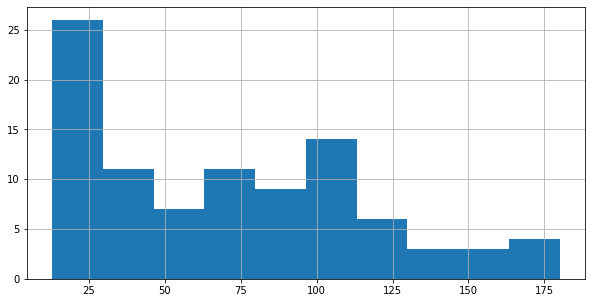

In [5]:
df['linkTime'].hist(bins=10,figsize=(10,5))

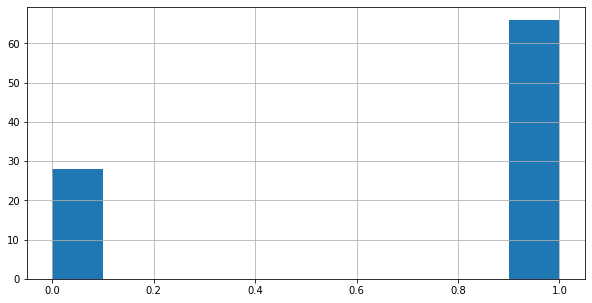

In [83]:
#распределение водителей совершившие покупку по полу
df['isMan'].hist(bins=10,figsize=(10,5))

In [13]:

fig = px.histogram(df['linkTime'], x="linkTime")
fig.show()


In [81]:
fig = px.histogram(df['region'], x="region")
fig.show()


In [74]:

df6=df[['kvs']]
fig = px.histogram(df6, x="kvs",
         marginal="box", # or violin, rug
                   hover_data=df6.columns)
fig.show()



In [75]:
df6.describe(include="all")

,kvs
count,94.000000
mean,1.030213
std,0.196014
min,0.960000
25%,0.960000
50%,0.960000
75%,1.010000
max,1.870000


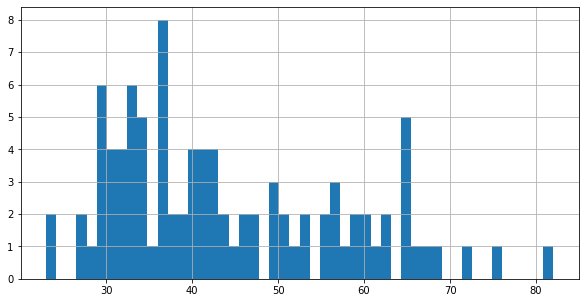

In [6]:
df['ageDriver'].hist(figsize=(10,5),bins=50)

In [40]:
df1[['ageDriver','isPaid']].head()

,ageDriver,isPaid
createdAt,,
2020-04-08 15:43:58,NaN,0
2020-04-09 10:36:10,41.0,0
2020-04-09 15:40:30,42.0,0
2020-04-10 11:23:52,39.0,0
2020-04-11 08:54:48,NaN,0


In [45]:
df6=df1[['ageDriver','isPaid']]
fig = px.histogram(df6, x="ageDriver",color="isPaid",
         marginal="box", # or violin, rug
                   hover_data=df6.columns)

fig.show()

In [87]:

df.head()

,isMan,firstName,companyCode,price,commission,action,licensePlate,vin,releaseYear,DiffVehiclesReleased,...,mark,power,region,kt,kbm,ko,kvs,km,kpr,linkTime
createdAt,,,,,,,,,,,,,,,,,,,,,
2020-04-16 10:25:07,1,Дмитрий,ALPHA_STRAH,8211.46,NaN,done,а338ав198,XW8AC2NH6JK119588,2018,2,...,Skoda,110,Санкт-Петербург,NaN,0.9,1.0,0.96,1.2,1.0,14
2020-04-22 02:55:36,0,Оксана,ALPHA_STRAH,4109.53,NaN,done,у010ст66,XTA21103040665597,2003,17,...,ВАЗ,90,Свердловская,NaN,0.9,1.0,0.96,1.1,1.0,22
2020-04-27 12:25:24,1,Сергей,TINKOFF,11424.00,NaN,done,к702рт777,Z94CB41BBHR375938,2016,4,...,Kia,123,Москва,NaN,1.0,1.0,0.96,1.4,1.0,54
2020-04-28 14:05:52,1,Сергей,SOGLASIE,6772.48,NaN,done,в452тт159,SHSRE78708U019705,2008,12,...,Honda,166,Пермский,NaN,1.0,1.0,1.04,1.6,1.0,95
2020-04-30 11:31:45,1,Борис,UGORIA,4665.60,NaN,done,с838ху97,X7L5SRATG52597461,2015,5,...,Renault,102,Москва,NaN,0.5,1.0,0.96,1.2,1.0,73


In [6]:
df.dtypes


isMan                     int64
firstName                object
companyCode              object
price                   float64
commission              float64
action                   object
licensePlate             object
vin                      object
releaseYear               int64
DiffVehiclesReleased      int64
birthday                 object
ageDriver                 int64
model                    object
mark                     object
power                     int64
region                   object
kt                      float64
kbm                     float64
ko                      float64
kvs                     float64
km                      float64
kpr                     float64
linkTime                  int64
dtype: object

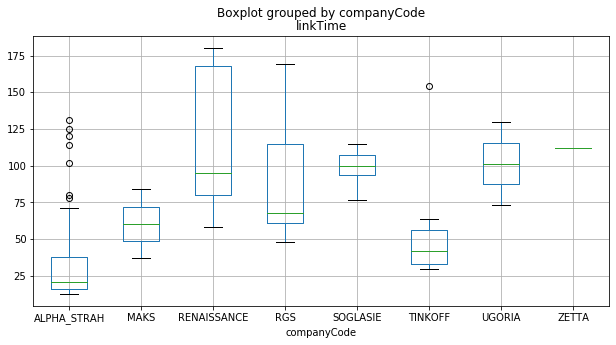

In [7]:
ax=df.boxplot(column='linkTime',by='companyCode',figsize=(10,5))

In [37]:
df5=df1[['linkTime','companyCode','isPaid']]
fig = px.box(df5,x="companyCode", y="linkTime", points="all",color="isPaid")
fig.show()


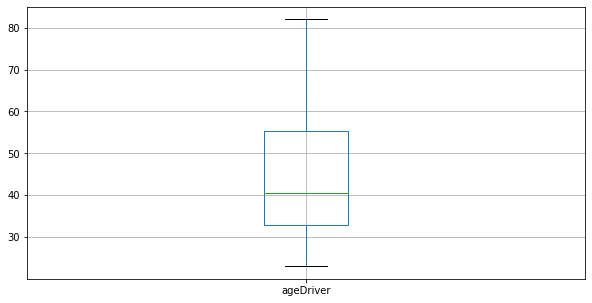

In [57]:
ax=df.boxplot(column='ageDriver',figsize=(10,5))

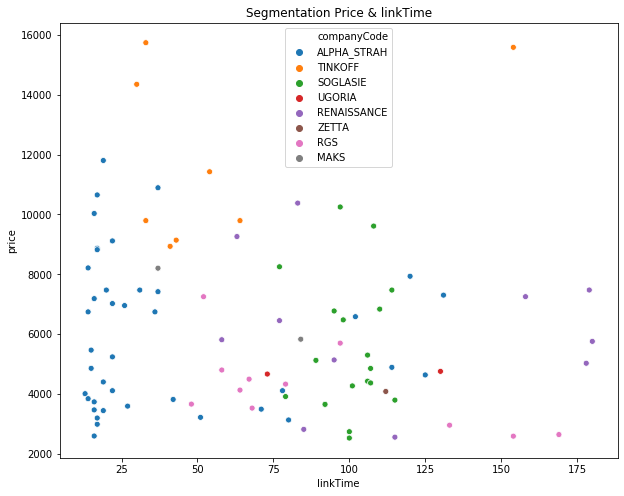

In [28]:
x_axis = df['linkTime']
y_axis = df['price']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df['companyCode'])
plt.title('Segmentation Price & linkTime')
plt.show()

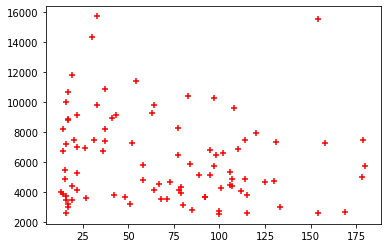

In [8]:
%matplotlib inline

plt.scatter(df.linkTime,df.price, color='red',marker='+')

In [36]:
reg=linear_model.LinearRegression()
reg.fit(df[['linkTime']],df.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
reg.coef_

array([-9.50867619])

In [40]:
reg.intercept_

6834.411814273928

In [41]:
-9.50867619*5000+6834.411814273928

-40708.969135726074

In [15]:
df1.groupby('ageDriver').count()

,isMan,companyCode,price,commission,action,licensePlate,vin,releaseYear,DiffVehiclesReleased,birthday,...,mark,power,region,kt,kbm,ko,kvs,km,kpr,linkTime
ageDriver,,,,,,,,,,,,,,,,,,,,,
22.0,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
23.0,2,2,2,0,2,2,2,2,2,2,...,2,2,2,0,2,2,2,2,2,2
24.0,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
26.0,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
27.0,3,3,3,0,3,3,3,3,3,3,...,3,3,3,0,3,3,3,3,3,3
28.0,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
29.0,3,3,3,0,3,2,2,3,3,3,...,3,3,3,0,3,3,3,3,3,3
30.0,8,8,8,0,8,8,8,8,8,8,...,8,8,8,0,8,8,8,8,8,8
31.0,8,8,8,1,8,8,4,8,8,8,...,8,8,8,0,8,8,8,8,8,8


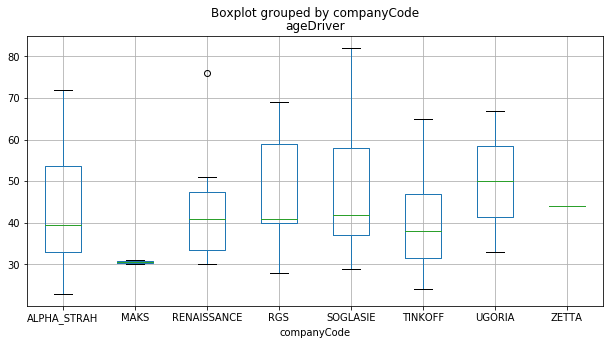

In [27]:
ax=df.boxplot(column='ageDriver',by='companyCode',figsize=(10,5))

In [59]:
#распределение по водителям
df5=df[['ageDriver']]
fig = px.box(df5,x="ageDriver", points="all")
fig.show()

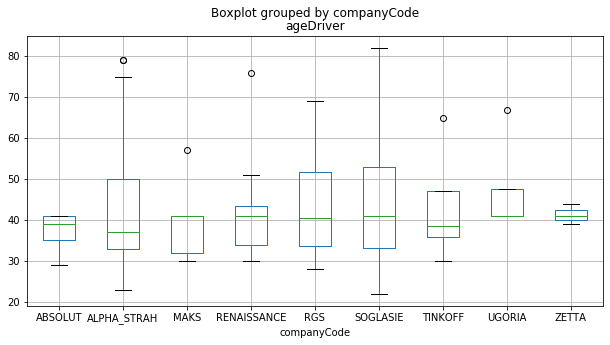

In [16]:
ax=df1.boxplot(column='ageDriver',by='companyCode',figsize=(10,5))

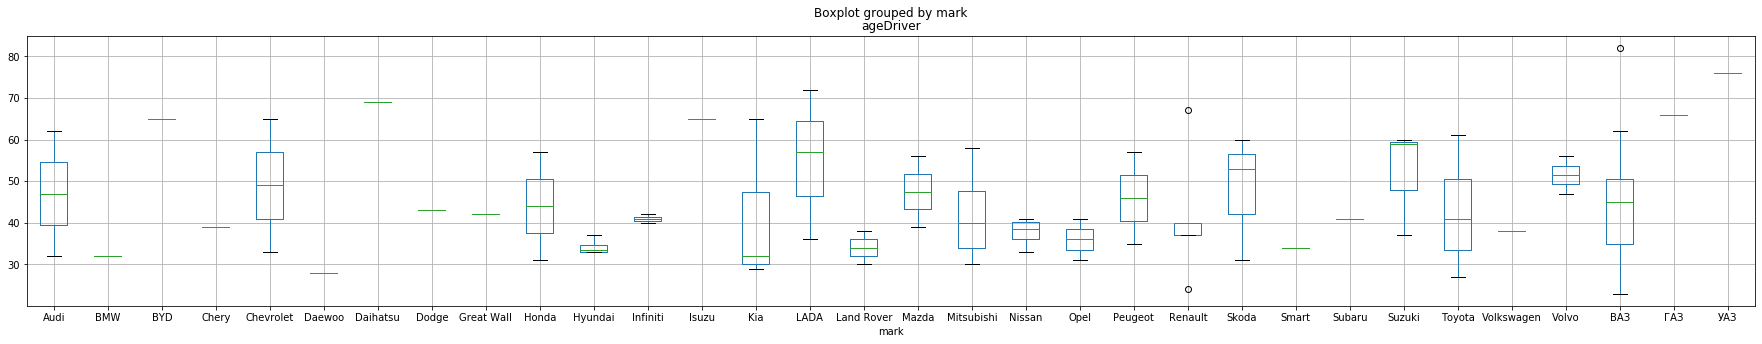

In [19]:
ax=df.boxplot(column='ageDriver',by='mark',figsize=(30,5))

In [64]:

fig = px.bar(df['mark'], x='mark',width=1000, height=800)
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

In [66]:
df.groupby('mark').count()

,isMan,companyCode,price,commission,action,licensePlate,vin,releaseYear,DiffVehiclesReleased,birthday,...,model,power,region,kt,kbm,ko,kvs,km,kpr,linkTime
mark,,,,,,,,,,,,,,,,,,,,,
Audi,2,2,2,0,2,2,2,2,2,2,...,2,2,2,0,2,2,2,2,2,2
BMW,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
BYD,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
Chery,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
Chevrolet,2,2,2,0,2,2,2,2,2,2,...,2,2,2,0,2,2,2,2,2,2
Daewoo,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
Daihatsu,1,1,1,0,1,1,0,1,1,1,...,1,1,1,0,1,1,1,1,1,1
Dodge,1,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1
Great Wall,1,1,1,0,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,1


In [55]:
df5=df1[['ageDriver','mark','isPaid']]
fig = px.box(df5,x="mark", y="ageDriver", color="isPaid", width=1000, height=800)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [56]:
df5=df1[['ageDriver','price','isPaid']]
fig = px.scatter(df5, x="price", y="ageDriver", facet_col="isPaid",
                 width=800, height=400)

fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

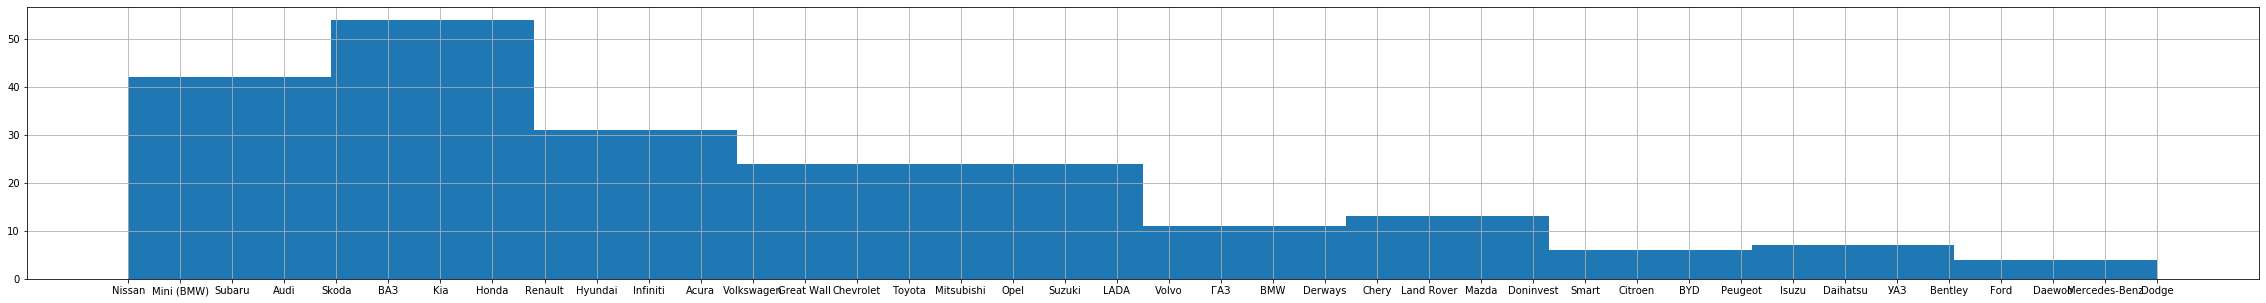

In [24]:
df1['mark'].hist(bins=10,figsize=(40,5))

In [ ]:
df['linkTime'].hist(bins=10,figsize=(10,5))

In [10]:

fig = px.histogram(df['ageDriver'], x="linkTime")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['ageDriver'] but received: linkTime